<a href="https://colab.research.google.com/github/N00ne07/Invisibility_cloak/blob/main/ipcv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                       **INVISIBLITY CLOAK**

**Invisibility Cloak is an implementation on computer vision using python scripting. In this project the webcam tries to capture a constant background then using HSV conversion get the followed up image colour composition and creates a mask of a specific type of colour *BLUE/RED* and displays the pre-captured background in that place. Giving an illusion of invisibility.**

# **ALGORITHM**

**The algorithm is very similar in principle to green screening. But unlike green screening where we remove the background, in this application, we remove the foreground**


**The basic idea is:**

**1-Capture and store the background frame.**

**2-Detect the red colored cloth using color detection algorithm.**

**3-Segment out the red colored cloth by generating a mask.**

**4-Generate the final augmented output to create the magical effect.**

**IMPORTING LIBRARIES**

In [ ]:
import cv2
import numpy as np
import time

**CAPTURING VIDEO**

In [ ]:
print(cv2.__version__)
capture_video = cv2.VideoCapture("video.mp4")

**WARMING UP THE CAMERA**

In [ ]:
time.sleep(3) 
count = 0 
background = 0 

**CAPTURING THE BACKGROUND**

In [ ]:
for i in range(60):
	return_val , background = capture_video.read()
	if return_val == False :
		continue

**READING FROM THE VIDEO**

In [ ]:
while (capture_video.isOpened()):
	return_val, img = capture_video.read()
	if not return_val :
		break 
	count = count + 1
	img = np.flip(img , axis=1)

**CONVERTING THE IMAGE BGR TO HSV**

In [ ]:
hsv = cv2.cvtColor(img , cv2.COLOR_BGR2HSV)

**GENERATING THE MASK**

In [ ]:
lower_red = np.array([0, 40, 40])
upper_red = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv,lower_red,upper_red)
lower_red = np.array([170,120,70])
upper_red = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv,lower_red,upper_red)
mask1 = mask1+mask2

**REFINING THE MASK**

In [ ]:
mask1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, np.ones((3,3),np.uint8),iterations=2)
mask1 = cv2.dilate(mask1,np.ones((3,3),np.uint8),iterations = 1)
mask2 = cv2.bitwise_not(mask1)

**GENERATING THE FINAL OUTPUT**

In [ ]:
res1 = cv2.bitwise_and(background,background,mask=mask1)
res2 = cv2.bitwise_and(img,img,mask=mask2)
final_output = cv2.addWeighted(res1,1,res2,1,0)
cv2.imshow("INVISIBLE MAN",final_output)
k = cv2.waitKey(10)
if k == 27:
	break

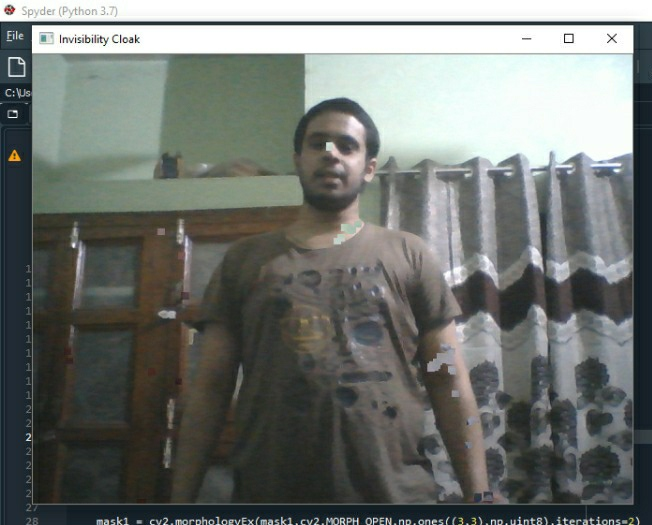

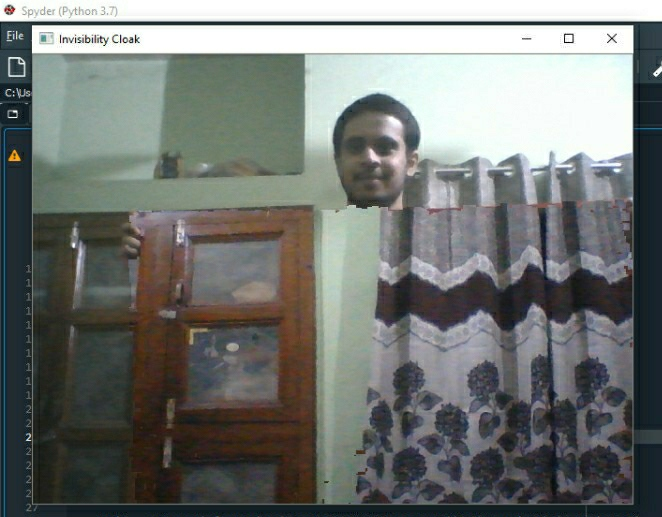

**SUBMITTED BY:-**

**ANANAY SRIVASTAVA - 18103033**

**SHIVANG CHATURVEDI - 18103056**

### ***THANK YOU***